#1단계 - 데이터 디렉토리 로드


In [7]:
# download 
!gdown https://drive.google.com/uc?id=1SZ5j8SJTCqQQuNHTMDHXSOMShKUvB479
!unzip open.zip

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1SZ5j8SJTCqQQuNHTMDHXSOMShKUvB479 

unzip:  cannot find or open open.zip, open.zip.zip or open.zip.ZIP.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

!unzip /content/drive/MyDrive/AI/open.zip

Mounted at /content/drive
unzip:  cannot find or open /content/drive/MyDrive/AI/open.zip, /content/drive/MyDrive/AI/open.zip.zip or /content/drive/MyDrive/AI/open.zip.ZIP.


In [ ]:
!unzip /content/drive/MyDrive/AI-Competition/open.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/0911.jpg          
  inflating: train/0912.jpg          
  inflating: train/0913.jpg          
  inflating: train/0914.jpg          
  inflating: train/0915.jpg          
  inflating: train/0916.jpg          
  inflating: train/0917.jpg          
  inflating: train/0918.jpg          
  inflating: train/0919.jpg          
  inflating: train/0920.jpg          
  inflating: train/0921.jpg          
  inflating: train/0922.jpg          
  inflating: train/0923.jpg          
  inflating: train/0924.jpg          
  inflating: train/0925.jpg          
  inflating: train/0926.jpg          
  inflating: train/0927.jpg          
  inflating: train/0928.jpg          
  inflating: train/0929.jpg          
  inflating: train/0930.jpg          
  inflating: train/0931.jpg          
  inflating: train/0932.jpg          
  inflating: train/0933.jpg          
  inflating: train/0934.jpg          
  inflating: train/0935.jpg          
  inflating: t

In [2]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import random
from tqdm import tqdm

In [ ]:
data_dir = '/content'

In [ ]:
train_csv = pd.read_csv(os.path.join(data_dir, 'train.csv'))

In [ ]:
train_csv

,id,img_path,artist
0,0,./train/0000.jpg,Diego Velazquez
1,1,./train/0001.jpg,Vincent van Gogh
2,2,./train/0002.jpg,Claude Monet
3,3,./train/0003.jpg,Edgar Degas
4,4,./train/0004.jpg,Hieronymus Bosch
...,...,...,...
5906,5906,./train/5906.jpg,Pieter Bruegel
5907,5907,./train/5907.jpg,Peter Paul Rubens
5908,5908,./train/5908.jpg,Paul Gauguin
5909,5909,./train/5909.jpg,Paul Gauguin


## 이미지 처리

In [ ]:
train_imgs = train_csv['img_path'].apply(lambda x : x[2:])
print(train_imgs)

## 라벨 처리

In [ ]:
labels = train_csv['artist']
print(labels)

0         Diego Velazquez
1        Vincent van Gogh
2            Claude Monet
3             Edgar Degas
4        Hieronymus Bosch
              ...        
5906       Pieter Bruegel
5907    Peter Paul Rubens
5908         Paul Gauguin
5909         Paul Gauguin
5910        Andrei Rublev
Name: artist, Length: 5911, dtype: object


In [ ]:
# encoder 생성
label_unique = labels.unique()
encoder = {value:key for key,value in enumerate(label_unique)}
decoder = {key:value for key,value in enumerate(label_unique)}

In [ ]:
labels = labels.apply(lambda x: encoder[x])

In [ ]:
cd /content

/content


파일 경로 알아내는 다른 방법
- os.listdir
- cv2

tqdm() 
- 진행률 표시 함수


## Train-valid 분리

In [ ]:
ratio = 0.7
length = int(len(train_imgs)*ratio)

# images
train_x = train_imgs[:length]
valid_x = train_imgs[length:]

# label
train_y = labels[:length]
valid_y = labels[length:]

## 이미지 제너레이터

In [ ]:
from tensorflow.keras.utils import Sequence
import math 
class Data_Generator(Sequence):
  def __init__(self,img_dirs,labels,img_size=256,batch_size=16):
    
    self.img_dirs = img_dirs 
    self.labels = labels 
    self.img_size = img_size 
    self.batch_size = batch_size 

  def __len__(self):
    return math.ceil(len(self.img_dirs)/self.batch_size)
  
  def img_preprocess(self,img):
    img = cv2.resize(img,dsize=(self.img_size,self.img_size))
    img = img/255.
    img = img.astype(np.float16)
    return img 

  def img_load(self,img_dir):
    img = cv2.imread(os.path.join(data_dir,img_dir))
    img = self.img_preprocess(img)
    return img 

  def __getitem__(self,index):
    self.batch_dirs = self.img_dirs[index*self.batch_size:(index+1)*self.batch_size]
    self.batch_labels = self.labels[index*self.batch_size:(index+1)*self.batch_size]

    self.batch_imgs = [self.img_load(img_dir) for img_dir in self.batch_dirs]
    return np.array(self.batch_imgs),np.array(self.batch_labels)

#train_loader = Data_Generator(data_dir = '../../Dacon_Painter_clf/Data')
#a,b = next(iter(train_loader))    

In [ ]:
train_loader = Data_Generator(train_x, train_y)
a,b = next(iter(train_loader))
print(a.shape,b.shape)

valid_loader = Data_Generator(valid_x,valid_y)
img,label = next(iter(valid_loader))
print(img.shape,label.shape)

## 1단계 정리

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import random
from tqdm import tqdm

# Drive 연결시 
# from google.colab import drive
# drive.mount('/content/drive')
# !unzip open.zip
# data_dir = '/content'
# train_csv = pd.read_csv(os.path.join(data_dir, 'train.csv'))

# url 로 파일 다운로드시
!gdown https://drive.google.com/uc?id=1SZ5j8SJTCqQQuNHTMDHXSOMShKUvB479
!unzip open.zip
train_csv = pd.read_csv('train.csv')

# train img path
train_imgs = train_csv['img_path'].apply(lambda x : x[2:])
print(train_imgs)

# label info
labels = train_csv['artist']
print(labels)

# encoder, decoder 생성
label_unique = labels.unique()
encoder = {value:key for key,value in enumerate(label_unique)}
decoder = {key:value for key,value in enumerate(label_unique)}

labels = labels.apply(lambda x: encoder[x])

## trian-valid 분리
ratio = 0.7
length = int(len(train_imgs)*ratio)

# images
train_x = train_imgs[:length]
valid_x = train_imgs[length:]

# label
train_y = labels[:length]
valid_y = labels[length:]

In [ ]:
# 이미지 제너레이터
from tensorflow.keras.utils import Sequence
import math 
class Data_Generator(Sequence):
  def __init__(self,img_dirs,labels,img_size=260,batch_size=16):
    
    self.img_dirs = img_dirs 
    self.labels = labels 
    self.img_size = img_size 
    self.batch_size = batch_size 

  def __len__(self):
    return math.ceil(len(self.img_dirs)/self.batch_size)
  
  def img_preprocess(self,img):
    img = cv2.resize(img, dsize=(self.img_size,self.img_size))
    img = img/255.
    img = img.astype(np.float32)
    return img 

  def img_load(self,img_dir):
    img = cv2.imread(os.path.join(data_dir,img_dir))
    img = self.img_preprocess(img)
    return img 

  def __getitem__(self,index):
    self.batch_dirs = self.img_dirs[index*self.batch_size:(index+1)*self.batch_size]
    self.batch_labels = self.labels[index*self.batch_size:(index+1)*self.batch_size]

    self.batch_imgs = [self.img_load(img_dir) for img_dir in self.batch_dirs]
    return np.array(self.batch_imgs),np.array(self.batch_labels)

train_loader = Data_Generator(train_x, train_y)
a,b = next(iter(train_loader))
print(a.shape,b.shape)

valid_loader = Data_Generator(valid_x,valid_y)
img,label = next(iter(valid_loader))
print(img.shape,label.shape)

(16, 260, 260, 3) (16,)
(16, 260, 260, 3) (16,)


# 2단계 - 모델 학습

## 하이퍼파라미터 정의

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import random
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization, GaussianNoise
from tensorflow.keras.regularizers import l1, l2, L1L2
from tensorflow.keras import applications 

from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization, GaussianNoise, Conv1D, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l1, l2, L1L2


In [ ]:
# 하이퍼 파라미터 조정 
class cfg:
    epochs = 50 
    lr = 1e-3 
    batch_size = 16 
    seed = 42 
    img_size = 224
#Random Seed 고정 
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(2)

seed_everything(cfg.seed)

In [ ]:
#콜백 
from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):
    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

#call backs 선언
plot_losses = PlotLosses()


In [ ]:
# mode complie 
optimizer = tf.optimizers.Adam(learning_rate = cfg.lr)
loss_fn = 'sparse_categorical_crossentropy'

## 하이퍼파라미터 정리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import random
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization, GaussianNoise
from tensorflow.keras.regularizers import l1, l2, L1L2
from tensorflow.keras import applications 

from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization, GaussianNoise, Conv1D, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l1, l2, L1L2

# 하이퍼 파라미터 조정 
class cfg:
    epochs = 50 
    lr = 1e-3 
    batch_size = 16 
    seed = 42 
    img_size = 224
#Random Seed 고정 
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(2)

seed_everything(cfg.seed)

#콜백 
from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):
    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

#call backs 선언
plot_losses = PlotLosses()

# mode complie 
optimizer = tf.optimizers.Adam(learning_rate = cfg.lr)
loss_fn = 'sparse_categorical_crossentropy'

## 모델 정의

### Conv2D

In [ ]:
model = keras.Sequential()
model.add(Input((224,224,3)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(len(label_unique), activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

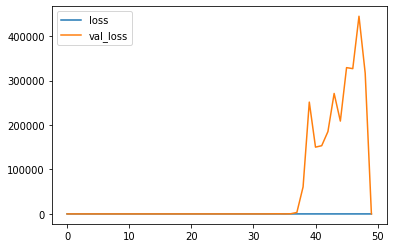

loss =  0.00035565582220442593 , val_loss =  6.528901100158691
259/259 [==============================] - 86s 333ms/step - loss: 3.5566e-04 - accuracy: 1.0000 - val_loss: 6.5289 - val_accuracy: 0.1928


In [ ]:
model.compile(optimizer=optimizer,loss = loss_fn,metrics=['accuracy'])
model.fit(x=train_loader,
          validation_data=valid_loader,
          batch_size = cfg.batch_size,
          epochs = cfg.epochs,
          verbose = 1,
          callbacks = [plot_losses],
          )
#학습한 모델 저장 
model.save('model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp model.h5 /content/drive/MyDrive/AI/conv2D.h5

### RES50

In [ ]:
res50 = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(cfg.img_size, cfg.img_size,3)) #size -> 256, 256 
res50.trainable = True # 전이학습

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization

img_input = layers.Input(shape=(224,224,3))

x = res50(img_input)
x = layers.Flatten()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(512,activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256,activation='relu')(x)
x = layers.Dropout(0.2)(x)
out = layers.Dense(len(label_unique),activation='softmax')(x)
model = keras.Model(img_input,out)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_1 (Batc  (None, 100352)           401408    
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 512)               51380736  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                           

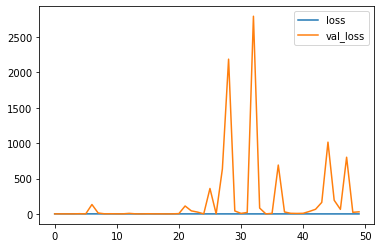

loss =  2.9371285438537598 , val_loss =  32.176387786865234
259/259 [==============================] - 87s 336ms/step - loss: 2.9371 - accuracy: 0.2330 - val_loss: 32.1764 - val_accuracy: 0.2142


In [ ]:
model.compile(optimizer=optimizer,loss = loss_fn,metrics=['accuracy'])
model.fit(x=train_loader,
          validation_data=valid_loader,
          batch_size = cfg.batch_size,
          epochs = cfg.epochs,
          verbose = 1,
          callbacks = [plot_losses],
          )
#학습한 모델 저장 
model.save('model.h5')

In [ ]:
!cp model.h5 /content/drive/MyDrive/AI/res50.h5

### EfficientNetB2

In [ ]:
effiB2 = tf.keras.applications.EfficientNetB2(
        include_top=True,
        weights="imagenet",
        input_tensor=None,
        input_shape=(260, 260, 3),
        pooling=None,
        classes=1000,
        classifier_activation="softmax",
    )
effiB2.trainable = True

In [ ]:
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization

img_input = layers.Input(shape=(260,260,3))
x = effiB2(img_input)
x = layers.Flatten()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(512,activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256,activation='relu')(x)
x = layers.Dropout(0.2)(x)
out = layers.Dense(len(label_unique),activation='softmax')(x)
model = keras.Model(img_input,out)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 260, 260, 3)]     0         
                                                                 
 efficientnetb2 (Functional)  (None, 1000)             9177569   
                                                                 
 flatten_4 (Flatten)         (None, 1000)              0         
                                                                 
 batch_normalization_8 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 512)               512512    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                           

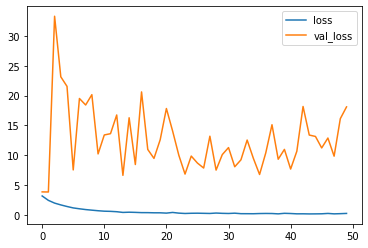

loss =  0.25096651911735535 , val_loss =  18.09636116027832
259/259 [==============================] - 118s 457ms/step - loss: 0.2510 - accuracy: 0.9398 - val_loss: 18.0964 - val_accuracy: 0.0254


In [ ]:
model.compile(optimizer=optimizer,loss = loss_fn,metrics=['accuracy'])
model.fit(x=train_loader,
          validation_data=valid_loader,
          batch_size = cfg.batch_size,
          epochs = cfg.epochs,
          verbose = 1,
          callbacks = [plot_losses],
          )
#학습한 모델 저장 
model.save('/content/drive/MyDrive/AI/effiB2.h5')

In [ ]:
model.save('/content/drive/MyDrive/AI/effiB2.h5')

# TEST 데이터

In [5]:
model = tf.keras.models.load_model('/content/drive/MyDrive/AI/effiB2.h5')

In [6]:
test_csv = pd.read_csv('/content/test.csv')

FileNotFoundError: ignored

In [ ]:
test_csv

,id,img_path
0,TEST_00000,./test/TEST_00000.jpg
1,TEST_00001,./test/TEST_00001.jpg
2,TEST_00002,./test/TEST_00002.jpg
3,TEST_00003,./test/TEST_00003.jpg
4,TEST_00004,./test/TEST_00004.jpg
...,...,...
12665,TEST_12665,./test/TEST_12665.jpg
12666,TEST_12666,./test/TEST_12666.jpg
12667,TEST_12667,./test/TEST_12667.jpg
12668,TEST_12668,./test/TEST_12668.jpg


In [ ]:
test_data = test_csv['img_path'].apply(lambda x : x[2:])
print(test_data)

0        test/TEST_00000.jpg
1        test/TEST_00001.jpg
2        test/TEST_00002.jpg
3        test/TEST_00003.jpg
4        test/TEST_00004.jpg
                ...         
12665    test/TEST_12665.jpg
12666    test/TEST_12666.jpg
12667    test/TEST_12667.jpg
12668    test/TEST_12668.jpg
12669    test/TEST_12669.jpg
Name: img_path, Length: 12670, dtype: object


In [ ]:
#테스트 데이터용 제너레이터 
from tensorflow.keras.utils import Sequence
import math 
class Test_Generator(Sequence):
  def __init__(self,img_dirs,img_size,batch_size):
    self.img_dirs = img_dirs 
    self.img_size = img_size 
    self.batch_size = batch_size 

  def __len__(self):
    return math.ceil(len(self.img_dirs)/self.batch_size)
  
  def img_preprocess(self,img):
    img = cv2.resize(img,dsize=(self.img_size,self.img_size))
    img = img/255.
    img = img.astype(np.float16)
    return img 

  def img_load(self,img_dir):
    img = cv2.imread(img_dir)
    img = self.img_preprocess(img)
    return img 

  def __getitem__(self,index):
    self.batch_dirs = self.img_dirs[index*self.batch_size:(index+1)*self.batch_size]

    temp_imgs = [self.img_load(img_dir) for img_dir in self.batch_dirs]
    return np.array(temp_imgs)

In [ ]:
test_data = Test_Generator(test_data,img_size=224,batch_size=8)

In [ ]:
y_ = model.predict(x=test_data)
predicted = np.argmax(y_,axis=1)

1584/1584 [==============================] - 79s 49ms/step


In [ ]:
predicted_label = pd.Series(predicted).apply(lambda x : decoder[x]).values

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission['artist'] = predicted_label
submission.to_csv('submission.csv',index=False)

batch size 16, 32 : 한번에 사용할 이미지. <br>
hard -> RAM -> GPU<br>
=> 데이터 제너레이터<br>

파이토치는 케라스보다 단순<br>
이미지 하나 불러오는 것만 짜면, 배치사이즈에 대해 불러옴<br>
셔플도 자동<br>


Fine - tuning <br>
Cov는 학습되어있는 거고, Dense만 학습할수도. <br>
Frozen <br>

callback는 건들지말자